In [5]:
import numpy as np
import scipy.signal as scisig
import matplotlib.pyplot as plt
import ipywidgets

def ricker(t, sigma):
    return 2/(np.sqrt(3*sigma)*np.pi**.25)*(1-(t/sigma)**2)*np.exp(-t**2/(2*sigma**2))

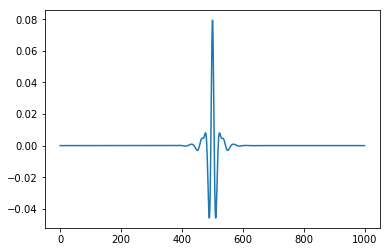

In [98]:
s=np.zeros(1000)
s[s.size//2]=1

s=scisig.filtfilt(*scisig.butter(2,np.array([24,60])/500, 'band'),s)

plt.plot(s)
plt.show()


In [269]:
slog=np.log(np.abs(np.fft.fft(s))) # log abs input spectrum

slog=np.fft.ifft(slog) # ifft
win=np.zeros_like(slog) # apply window
    
win[:slog.size//2]=2

win[0]=1
if(slog.size%2==0):
    win[slog.size//2]=1

slog*=win

explog=np.exp(np.fft.fft(slog))
wl=np.real(np.fft.ifft(explog))
wl[400:]=0

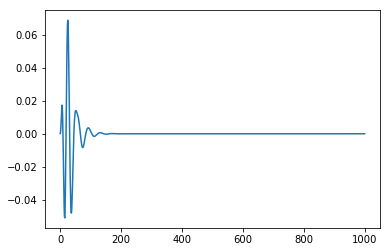

In [270]:
plt.plot(wl)
# plt.plot(np.abs(np.fft.fft(wl)))
plt.show()

In [122]:
def fix_spectrum(spec):
    spec[(spec.size)//2+1:] = np.conj(spec[(spec.size-1)//2:0:-1])

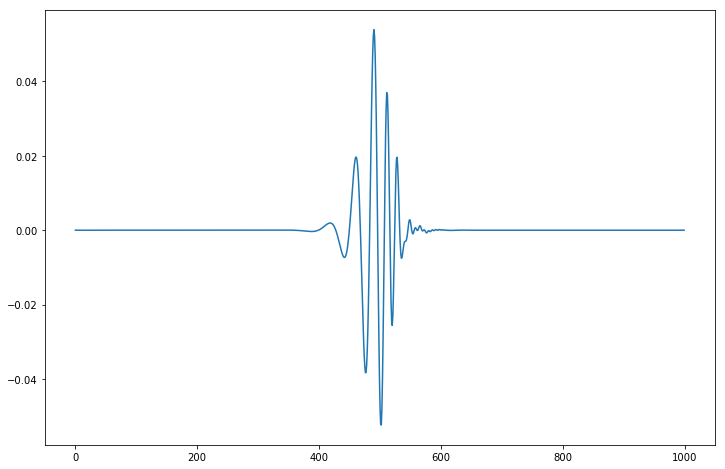

In [301]:
def sig(w):
    lin_shift=np.exp(-np.pi*1j*np.arange(wl.size)**1.05/12*w)\
        * np.exp(np.pi*1j*np.arange(wl.size)/12 * (21+w))
#         * np.exp(np.pi*1j*np.arange(wl.size)/9.5 * (12+w))

#     lin_shift=np.exp(-np.pi*1j*np.arange(wl.size)/12*w)
        
    fix_spectrum(lin_shift)
    return np.real(np.fft.ifft(np.fft.fft(wl)*lin_shift))


@ipywidgets.interact(w=(0,60,.2))
def plot_shift(w=0):
    plt.figure(figsize=(12,8))
    plt.plot(sig(w))
    plt.show()

In [256]:
w=np.arange(0,50,.2)

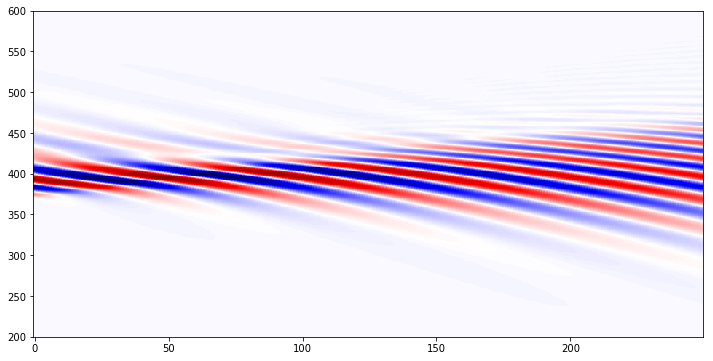

In [282]:
plt.figure(figsize=(12,6))
plt.imshow(np.vstack(map(sig,w)).T, cmap='seismic', aspect='auto')
plt.ylim([200 , 600])
plt.show()

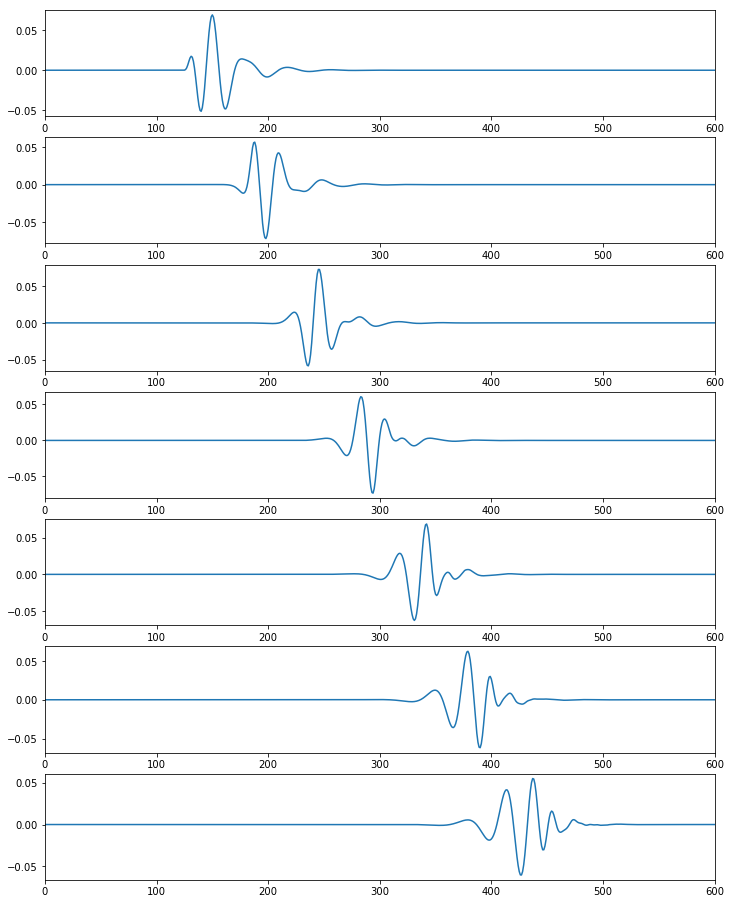

In [313]:
k=7
f,ax=plt.subplots(nrows=k,figsize=(12,16))
for a,i in zip(ax,np.linspace(0,25,k)):
    a.plot(sig(i))
    a.set_xlim([0,600])
plt.show()